In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('muc123a.csv')

# Create a variable that identifies people in the same household:
df['household_id'] = None

df['household_id'] = df.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)

# Create a variable that stores the number of people living in one household
df['household_size'] = df.groupby(['tinh','huyen','xa','diaban','hoso'])['matv'].transform('max')
df['household_size']

print(df)

       tinh  huyen    xa  diaban  hoso  matv  m1ac2  m1ac3  m1ac4a  m1ac4b  \
0       101      1   3.0       1    13     1      2      1       9    1934   
1       101      1   3.0       1    13     2      2      3       1    1969   
2       101      1   3.0       1    13     3      2      3       8    1974   
3       101      1   3.0       1    14     1      1      1      10    1943   
4       101      1   3.0       1    14     2      2      2       5    1955   
...     ...    ...   ...     ...   ...   ...    ...    ...     ...     ...   
38248   823     13  17.0       1    14     5      1      3      11    2003   
38249   823     13  17.0       1    20     1      1      1      -2    1951   
38250   823     13  17.0       1    20     2      2      2      -2    1955   
38251   823     13  17.0       1    20     3      1      3       5    1985   
38252   823     13  17.0       1    20     4      2      3       9    1992   

       ...  m2ac15  m2ac16  m3c1  m3c2  m3c3a  m3c3b  m3c4  m3c

In [409]:
# Remove all non-head people from the dataset
df = df[df['m1ac3'] == 1]
# Remove all female heads from the dataset
df = df[df['m1ac2'] == 1]
df.count()
# Limit dataset columns to only relevant variables
df = df[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm1ac3', 'm1ac2', 'household_size','m1ac5', 'household_id']]
# Limit dataset to only heads over 25 years old
df = df[df['m1ac5'] >= 25]
df

,tinh,huyen,xa,diaban,hoso,matv,m1ac3,m1ac2,household_size,m1ac5,household_id
3,101,1,3.0,1,14,1,1,1,3,64,"101, 1, 3, 1, 14"
6,101,1,3.0,1,15,1,1,1,2,61,"101, 1, 3, 1, 15"
8,101,1,9.0,19,15,1,1,1,2,50,"101, 1, 9, 19, 15"
13,101,1,9.0,19,20,1,1,1,3,50,"101, 1, 9, 19, 20"
16,101,1,15.0,50,13,1,1,1,4,35,"101, 1, 15, 50, 13"
...,...,...,...,...,...,...,...,...,...,...,...
38231,823,13,12.0,25,15,1,1,1,6,78,"823, 13, 12, 25, 15"
38237,823,13,12.0,25,19,1,1,1,4,32,"823, 13, 12, 25, 19"
38241,823,13,17.0,1,13,1,1,1,3,57,"823, 13, 17, 1, 13"
38244,823,13,17.0,1,14,1,1,1,5,45,"823, 13, 17, 1, 14"


In [410]:
df4 = pd.read_csv('muc4a.csv')
# Create a variable that identifies people in the same household:
df4['household_id'] = df4.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)

# Fill people with no income in cell to become 0
df4['m4ac11'] = df4['m4ac11'].fillna(0)
df4['m4ac12f'] = df4['m4ac12f'].fillna(0)
df4['m4ac21'] = df4['m4ac21'].fillna(0)
df4['m4ac22f'] = df4['m4ac22f'].fillna(0)
df4['m4ac25'] = df4['m4ac25'].fillna(0)

# Keep only relevant variables
df_income = df4[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25', 'household_id']]
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,2,17632.0,918,0.0,0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,3,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14"
4,101,1,3.0,1,14,2,14117.0,0,0.0,0,0.0,"101, 1, 3, 1, 14"
...,...,...,...,...,...,...,...,...,...,...,...,...
35149,823,13,17.0,1,14,4,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14"
35150,823,13,17.0,1,20,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"
35151,823,13,17.0,1,20,2,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"
35152,823,13,17.0,1,20,3,31399.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"


In [411]:
# Calculate to total individual incomes from different sources of income

df_income.loc[:, 'Total Individual Income'] = (
    df_income['m4ac11'] + df_income['m4ac12f'] +
    df_income['m4ac21'] + df_income['m4ac22f'] + df_income['m4ac25']
)

/var/folders/fb/bd3n51196jg25jmyy378kg_40000gn/T/ipykernel_1545/1222130114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income.loc[:, 'Total Individual Income'] = (


In [412]:
# Calculate Total Household Income by grouping people with the same household ID
household_income = df_income.groupby('household_id')['Total Individual Income'].sum().reset_index()
household_income.rename(columns={'Total Individual Income': 'Total Household Income'}, inplace=True)
df_income = df_income.merge(household_income, on='household_id', how='left')
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
1,101,1,3.0,1,13,2,17632.0,918,0.0,0,0.0,"101, 1, 3, 1, 13",18550.0,18550.0
2,101,1,3.0,1,13,3,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0
4,101,1,3.0,1,14,2,14117.0,0,0.0,0,0.0,"101, 1, 3, 1, 14",14117.0,56468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,823,13,17.0,1,14,4,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0
35150,823,13,17.0,1,20,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",0.0,31399.0
35151,823,13,17.0,1,20,2,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",0.0,31399.0
35152,823,13,17.0,1,20,3,31399.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",31399.0,31399.0


In [413]:
# Only including data for household heads
df_income = df_income[df_income['matv'] == 1]
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0
6,101,1,3.0,1,15,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 15",0.0,42351.0
8,101,1,9.0,19,15,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 15",0.0,0.0
10,101,1,9.0,19,19,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 19",0.0,22040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35134,823,13,12.0,25,15,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 15",0.0,27677.0
35140,823,13,12.0,25,19,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 19",0.0,0.0
35143,823,13,17.0,1,13,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 13",0.0,0.0
35146,823,13,17.0,1,14,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0


In [414]:
# Merge income dataset with our original data
df_new = df_income.merge(df, on=['household_id', 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='inner')
df_new.to_csv("gender+income.csv", index=False)
df_new

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 15",0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 15",0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,1,33061.0,918,0.0,0,0.0,"101, 1, 9, 19, 20",33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,1,79055.0,12800,0.0,0,0.0,"101, 1, 15, 50, 13",91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 15",0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 19",0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 13",0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0,1,1,5,45


In [415]:
df_new

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 15",0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 15",0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,1,33061.0,918,0.0,0,0.0,"101, 1, 9, 19, 20",33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,1,79055.0,12800,0.0,0,0.0,"101, 1, 15, 50, 13",91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 15",0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 19",0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 13",0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0,1,1,5,45


In [416]:
# Work with data on consumption

# Consumption of food and drink on holidays

df_holiday = pd.read_csv('muc5a1.csv')
df_holiday['household_id'] = df_holiday.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_holiday

,tinh,huyen,xa,diaban,hoso,m5a1c1,m5a1c1a,m5a1c2a,m5a1c2b,m5a1c3a,m5a1c3b,household_id
0,101,1,3.0,1,13,134.0,NaN,NaN,336.0,NaN,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,153.0,NaN,0.5,33.6,0.0,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,139.0,NaN,1.0,9.6,0.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,111.0,NaN,1.0,96.0,0.0,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,110.0,NaN,2.0,134.4,0.0,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
134646,823,13,17.0,1,20,134.0,NaN,NaN,27.5,NaN,0.0,"823, 13, 17, 1, 20"
134647,823,13,17.0,1,20,153.0,NaN,0.2,10.1,0.0,NaN,"823, 13, 17, 1, 20"
134648,823,13,17.0,1,20,154.0,NaN,NaN,0.0,NaN,27.3,"823, 13, 17, 1, 20"
134649,823,13,17.0,1,20,101.0,NaN,10.0,54.9,10.0,54.6,"823, 13, 17, 1, 20"


In [417]:
print(df_holiday.columns.tolist())

['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a1c1', 'm5a1c1a', 'm5a1c2a', 'm5a1c2b', 'm5a1c3a', 'm5a1c3b', 'household_id']


In [418]:
df_holiday

,tinh,huyen,xa,diaban,hoso,m5a1c1,m5a1c1a,m5a1c2a,m5a1c2b,m5a1c3a,m5a1c3b,household_id
0,101,1,3.0,1,13,134.0,NaN,NaN,336.0,NaN,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,153.0,NaN,0.5,33.6,0.0,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,139.0,NaN,1.0,9.6,0.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,111.0,NaN,1.0,96.0,0.0,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,110.0,NaN,2.0,134.4,0.0,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
134646,823,13,17.0,1,20,134.0,NaN,NaN,27.5,NaN,0.0,"823, 13, 17, 1, 20"
134647,823,13,17.0,1,20,153.0,NaN,0.2,10.1,0.0,NaN,"823, 13, 17, 1, 20"
134648,823,13,17.0,1,20,154.0,NaN,NaN,0.0,NaN,27.3,"823, 13, 17, 1, 20"
134649,823,13,17.0,1,20,101.0,NaN,10.0,54.9,10.0,54.6,"823, 13, 17, 1, 20"


In [419]:
holiday_consumption = df_holiday.groupby('household_id')['m5a1c2b'].sum().reset_index()
holiday_consumption.rename(columns={'m5a1c2b': 'Total Holiday Spending On Food'}, inplace=True)
df_holiday= df_holiday.merge(holiday_consumption, on='household_id', how='left')
print(df_holiday)

        tinh  huyen    xa  diaban  hoso  m5a1c1  m5a1c1a  m5a1c2a  m5a1c2b  \
0        101      1   3.0       1    13   134.0      NaN      NaN    336.0   
1        101      1   3.0       1    13   153.0      NaN      0.5     33.6   
2        101      1   3.0       1    13   139.0      NaN      1.0      9.6   
3        101      1   3.0       1    13   111.0      NaN      1.0     96.0   
4        101      1   3.0       1    13   110.0      NaN      2.0    134.4   
...      ...    ...   ...     ...   ...     ...      ...      ...      ...   
134646   823     13  17.0       1    20   134.0      NaN      NaN     27.5   
134647   823     13  17.0       1    20   153.0      NaN      0.2     10.1   
134648   823     13  17.0       1    20   154.0      NaN      NaN      0.0   
134649   823     13  17.0       1    20   101.0      NaN     10.0     54.9   
134650   823     13  17.0       1    20   139.0      NaN      0.5      4.1   

        m5a1c3a  m5a1c3b        household_id  Total Holiday Spe

In [420]:
holiday_consumption_received = df_holiday.groupby('household_id')['m5a1c3b'].sum().reset_index()
holiday_consumption_received.rename(columns={'m5a1c3b': 'Total Holiday Spending On Food - Self-Supplied'}, inplace=True)
df_holiday= df_holiday.merge(holiday_consumption_received, on='household_id', how='left')
print(df_holiday)

        tinh  huyen    xa  diaban  hoso  m5a1c1  m5a1c1a  m5a1c2a  m5a1c2b  \
0        101      1   3.0       1    13   134.0      NaN      NaN    336.0   
1        101      1   3.0       1    13   153.0      NaN      0.5     33.6   
2        101      1   3.0       1    13   139.0      NaN      1.0      9.6   
3        101      1   3.0       1    13   111.0      NaN      1.0     96.0   
4        101      1   3.0       1    13   110.0      NaN      2.0    134.4   
...      ...    ...   ...     ...   ...     ...      ...      ...      ...   
134646   823     13  17.0       1    20   134.0      NaN      NaN     27.5   
134647   823     13  17.0       1    20   153.0      NaN      0.2     10.1   
134648   823     13  17.0       1    20   154.0      NaN      NaN      0.0   
134649   823     13  17.0       1    20   101.0      NaN     10.0     54.9   
134650   823     13  17.0       1    20   139.0      NaN      0.5      4.1   

        m5a1c3a  m5a1c3b        household_id  Total Holiday Spe

In [421]:
df_holiday = df_holiday.drop_duplicates(subset='household_id', keep='first')
df_holiday = df_holiday[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Holiday Spending On Food', 'Total Holiday Spending On Food - Self-Supplied']]
df_holiday

,tinh,huyen,xa,diaban,hoso,household_id,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",1288.3,296.1
17,101,1,3.0,1,14,"101, 1, 3, 1, 14",3473.3,1146.0
40,101,1,3.0,1,15,"101, 1, 3, 1, 15",2957.7,573.0
63,101,1,9.0,19,15,"101, 1, 9, 19, 15",1555.2,0.0
80,101,1,9.0,19,19,"101, 1, 9, 19, 19",1852.8,0.0
...,...,...,...,...,...,...,...,...
134602,823,13,12.0,25,15,"823, 13, 12, 25, 15",278.4,38.2
134612,823,13,12.0,25,19,"823, 13, 12, 25, 19",573.7,81.9
134625,823,13,17.0,1,13,"823, 13, 17, 1, 13",242.5,286.5
134634,823,13,17.0,1,14,"823, 13, 17, 1, 14",482.0,0.0


In [422]:
df_new = df_holiday.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3473.3,1146.0,1,39528.0,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",2957.7,573.0,1,0.0,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1555.2,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1993.9,0.0,1,33061.0,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",5259.8,0.0,1,79055.0,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",278.4,38.2,1,0.0,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",573.7,81.9,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",242.5,286.5,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",482.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [423]:
df_daily = pd.read_csv('muc5a2.csv')
df_daily['household_id'] = df_daily.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"


In [424]:
daily_consumption = df_daily.groupby('household_id')['m5a2c6'].sum().reset_index()
daily_consumption.rename(columns={'m5a2c6': 'Total Daily Spending On Food'}, inplace=True)
df_daily= df_daily.merge(daily_consumption, on='household_id', how='left')
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id,Total Daily Spending On Food
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2


In [425]:
daily_consumption_received = df_daily.groupby('household_id')['m5a2c10'].sum().reset_index()
daily_consumption_received.rename(columns={'m5a2c10': 'Total Daily Spending On Food - Self-Supplied'}, inplace=True)
df_daily= df_daily.merge(daily_consumption_received, on='household_id', how='left')
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0


In [426]:
df_daily = df_daily.drop_duplicates(subset='household_id', keep='first')
df_daily = df_daily[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Daily Spending On Food', 'Total Daily Spending On Food - Self-Supplied']]
df_daily

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",24438.8,0.0
43,101,1,3.0,1,14,"101, 1, 3, 1, 14",36904.7,0.0
95,101,1,3.0,1,15,"101, 1, 3, 1, 15",38741.9,0.0
150,101,1,9.0,19,15,"101, 1, 9, 19, 15",17770.4,0.0
178,101,1,9.0,19,19,"101, 1, 9, 19, 19",20078.0,0.0
...,...,...,...,...,...,...,...,...
310363,823,13,12.0,25,15,"823, 13, 12, 25, 15",10468.8,2578.5
310385,823,13,12.0,25,19,"823, 13, 12, 25, 19",8964.7,1092.0
310411,823,13,17.0,1,13,"823, 13, 17, 1, 13",7349.5,1056.2
310426,823,13,17.0,1,14,"823, 13, 17, 1, 14",9983.0,3600.0


In [427]:
df_new = df_daily.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",36904.7,0.0,3473.3,1146.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",38741.9,0.0,2957.7,573.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",17770.4,0.0,1555.2,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",22501.7,0.0,1993.9,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",51339.0,0.0,5259.8,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",10468.8,2578.5,278.4,38.2,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",8964.7,1092.0,573.7,81.9,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",7349.5,1056.2,242.5,286.5,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",9983.0,3600.0,482.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [428]:
#Daily Non-Food Expenditure
df_nonfood = pd.read_csv('muc5b1.csv')
df_nonfood['household_id'] = df_nonfood.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_nonfood


,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20"
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20"
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20"
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20"


In [429]:
daily_consumption_nf = df_nonfood.groupby('household_id')['m5b1c4'].sum().reset_index()
daily_consumption_nf.rename(columns={'m5b1c4': 'Total Daily Spending On Non-Food'}, inplace=True)
df_nonfood= df_nonfood.merge(daily_consumption_nf, on='household_id', how='left')
df_nonfood

,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id,Total Daily Spending On Non-Food
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13",7560.0
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13",7560.0
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13",7560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20",5188.0
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20",5188.0
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0


In [430]:
daily_consumption_nf_received = df_nonfood.groupby('household_id')['m5b1c5'].sum().reset_index()
daily_consumption_nf_received.rename(columns={'m5b1c5': 'Total Daily Spending On Non-Food - Self-Supplied'}, inplace=True)
df_nonfood= df_nonfood.merge(daily_consumption_nf_received, on='household_id', how='left')
df_nonfood

,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13",7560.0,0.0
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20",5188.0,1620.0
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0


In [431]:
df_nonfood = df_nonfood.drop_duplicates(subset='household_id', keep='first')
df_nonfood = df_nonfood[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Daily Spending On Non-Food', 'Total Daily Spending On Non-Food - Self-Supplied']]
df_nonfood

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",7560.0,0.0
15,101,1,3.0,1,14,"101, 1, 3, 1, 14",21586.0,0.0
34,101,1,3.0,1,15,"101, 1, 3, 1, 15",21488.0,0.0
52,101,1,9.0,19,15,"101, 1, 9, 19, 15",7012.0,0.0
66,101,1,9.0,19,19,"101, 1, 9, 19, 19",8190.0,0.0
...,...,...,...,...,...,...,...,...
117718,823,13,12.0,25,15,"823, 13, 12, 25, 15",1516.0,300.0
117729,823,13,12.0,25,19,"823, 13, 12, 25, 19",2070.0,600.0
117742,823,13,17.0,1,13,"823, 13, 17, 1, 13",911.0,720.0
117751,823,13,17.0,1,14,"823, 13, 17, 1, 14",1056.0,1080.0


In [432]:
df_new = df_nonfood.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",21586.0,0.0,36904.7,0.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",21488.0,0.0,38741.9,0.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",7012.0,0.0,17770.4,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",9280.0,0.0,22501.7,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",17447.0,0.0,51339.0,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",1516.0,300.0,10468.8,2578.5,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",2070.0,600.0,8964.7,1092.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",911.0,720.0,7349.5,1056.2,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",1056.0,1080.0,9983.0,3600.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [433]:
df_annual = pd.read_csv('muc5b2.csv')
df_annual['household_id'] = df_annual.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_annual


,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20"
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20"
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20"
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20"


In [434]:
annual_consumption = df_annual.groupby('household_id')['m5b2c2'].sum().reset_index()
annual_consumption.rename(columns={'m5b2c2': 'Total Annual Consumption Expenditure'}, inplace=True)
df_annual= df_annual.merge(annual_consumption, on='household_id', how='left')
df_annual

,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id,Total Annual Consumption Expenditure
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13",7350.0
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13",7350.0
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13",7350.0
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13",7350.0
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13",7350.0
...,...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20",1035.0
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20",1035.0
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20",1035.0
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20",1035.0


In [435]:
annual_consumption_received = df_annual.groupby('household_id')['m5b2c3'].sum().reset_index()
annual_consumption_received.rename(columns={'m5b2c3': 'Total Annual Consumption Expenditure - Self-Supplied'}, inplace=True)
df_annual= df_annual.merge(annual_consumption_received, on='household_id', how='left')
df_annual

,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0


In [436]:
df_annual = df_annual.drop_duplicates(subset='household_id', keep='first')
df_annual = df_annual[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Annual Consumption Expenditure', 'Total Annual Consumption Expenditure - Self-Supplied']]
df_annual

,tinh,huyen,xa,diaban,hoso,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",7350.0,0.0
16,101,1,3.0,1,14,"101, 1, 3, 1, 14",18950.0,0.0
41,101,1,3.0,1,15,"101, 1, 3, 1, 15",16235.0,0.0
64,101,1,9.0,19,15,"101, 1, 9, 19, 15",7130.0,0.0
78,101,1,9.0,19,19,"101, 1, 9, 19, 19",8060.0,0.0
...,...,...,...,...,...,...,...,...
117872,823,13,12.0,25,15,"823, 13, 12, 25, 15",391.0,0.0
117881,823,13,12.0,25,19,"823, 13, 12, 25, 19",970.0,0.0
117890,823,13,17.0,1,13,"823, 13, 17, 1, 13",355.0,0.0
117893,823,13,17.0,1,14,"823, 13, 17, 1, 14",760.0,0.0


In [437]:
df_new = df_annual.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",18950.0,0.0,21586.0,0.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",16235.0,0.0,21488.0,0.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",7130.0,0.0,7012.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",10040.0,0.0,9280.0,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",17091.0,0.0,17447.0,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",391.0,0.0,1516.0,300.0,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",970.0,0.0,2070.0,600.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",355.0,0.0,911.0,720.0,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",760.0,0.0,1056.0,1080.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [438]:
df_other = pd.read_csv('muc5b3.csv')
df_other['household_id'] = df_other.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_other

,tinh,huyen,xa,diaban,hoso,m5b3c1,m5b3c1a,m5b3c2,household_id
0,101,1,3.0,1,13,401.0,NaN,70.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,406.0,NaN,500.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,407.0,NaN,2000.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,14,407.0,NaN,4000.0,"101, 1, 3, 1, 14"
4,101,1,3.0,1,14,401.0,NaN,70.0,"101, 1, 3, 1, 14"
...,...,...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,NaN,NaN,NaN,"823, 13, 12, 25, 15"
31637,823,13,12.0,25,19,NaN,NaN,NaN,"823, 13, 12, 25, 19"
31638,823,13,17.0,1,13,402.0,NaN,70.0,"823, 13, 17, 1, 13"
31639,823,13,17.0,1,14,407.0,NaN,300.0,"823, 13, 17, 1, 14"


In [439]:
other = df_other.groupby('household_id')['m5b3c2'].sum().reset_index()
other.rename(columns={'m5b3c2': 'Other Spending'}, inplace=True)
df_other= df_other.merge(other, on='household_id', how='left')
df_other

,tinh,huyen,xa,diaban,hoso,m5b3c1,m5b3c1a,m5b3c2,household_id,Other Spending
0,101,1,3.0,1,13,401.0,NaN,70.0,"101, 1, 3, 1, 13",2570.0
1,101,1,3.0,1,13,406.0,NaN,500.0,"101, 1, 3, 1, 13",2570.0
2,101,1,3.0,1,13,407.0,NaN,2000.0,"101, 1, 3, 1, 13",2570.0
3,101,1,3.0,1,14,407.0,NaN,4000.0,"101, 1, 3, 1, 14",8150.0
4,101,1,3.0,1,14,401.0,NaN,70.0,"101, 1, 3, 1, 14",8150.0
...,...,...,...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,NaN,NaN,NaN,"823, 13, 12, 25, 15",0.0
31637,823,13,12.0,25,19,NaN,NaN,NaN,"823, 13, 12, 25, 19",0.0
31638,823,13,17.0,1,13,402.0,NaN,70.0,"823, 13, 17, 1, 13",70.0
31639,823,13,17.0,1,14,407.0,NaN,300.0,"823, 13, 17, 1, 14",300.0


In [440]:
df_other = df_other.drop_duplicates(subset='household_id', keep='first')
df_other = df_other[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Other Spending']]
df_other

,tinh,huyen,xa,diaban,hoso,household_id,Other Spending
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",2570.0
3,101,1,3.0,1,14,"101, 1, 3, 1, 14",8150.0
8,101,1,3.0,1,15,"101, 1, 3, 1, 15",7850.0
12,101,1,9.0,19,15,"101, 1, 9, 19, 15",760.0
15,101,1,9.0,19,19,"101, 1, 9, 19, 19",770.0
...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0
31637,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0
31638,823,13,17.0,1,13,"823, 13, 17, 1, 13",70.0
31639,823,13,17.0,1,14,"823, 13, 17, 1, 14",300.0


In [441]:
df_new = df_other.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,Total Daily Spending On Non-Food,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",8150.0,18950.0,0.0,21586.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",7850.0,16235.0,0.0,21488.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",760.0,7130.0,0.0,7012.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",640.0,10040.0,0.0,9280.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",1800.0,17091.0,0.0,17447.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,391.0,0.0,1516.0,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,970.0,0.0,2070.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",70.0,355.0,0.0,911.0,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",300.0,760.0,0.0,1056.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [442]:
df_hexpenses = pd.read_csv('muc7.csv')
df_hexpenses['household_id'] = df_hexpenses.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_hexpenses

,tinh,huyen,xa,diaban,hoso,m7c1,m7c2,m7c3,m7c4,m7c5,...,m7c37,m7c38,m7c39,m7c391,m7c40,m7c41,m7c42,m7c43,m7c44,household_id
0,101,1,3.0,1,13,1,60.0,2.0,1957.0,NaN,...,1,1,108.0,NaN,4668,2,NaN,NaN,NaN,"101, 1, 3, 1, 13"
1,101,1,3.0,1,14,1,60.0,2.0,1943.0,NaN,...,1,1,108.0,NaN,3828,1,1.0,12.0,4000.0,"101, 1, 3, 1, 14"
2,101,1,3.0,1,15,1,36.0,2.0,1970.0,NaN,...,1,1,72.0,NaN,23072,2,NaN,NaN,NaN,"101, 1, 3, 1, 15"
3,101,1,9.0,19,15,1,48.0,2.0,2002.0,2.0,...,1,1,72.0,NaN,1692,2,NaN,NaN,NaN,"101, 1, 9, 19, 15"
4,101,1,9.0,19,19,1,120.0,2.0,2000.0,NaN,...,1,1,108.0,NaN,1968,1,2.0,NaN,NaN,"101, 1, 9, 19, 19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9184,823,13,12.0,25,15,1,24.0,5.0,2006.0,5.0,...,2,2,NaN,NaN,840,2,NaN,NaN,NaN,"823, 13, 12, 25, 15"
9185,823,13,12.0,25,19,1,70.0,4.0,2008.0,5.0,...,2,2,NaN,NaN,30600,2,NaN,NaN,NaN,"823, 13, 12, 25, 19"
9186,823,13,17.0,1,13,1,28.0,5.0,2001.0,5.0,...,2,2,NaN,NaN,0,2,NaN,NaN,NaN,"823, 13, 17, 1, 13"
9187,823,13,17.0,1,14,1,28.0,5.0,2001.0,5.0,...,2,2,NaN,NaN,0,2,NaN,NaN,NaN,"823, 13, 17, 1, 14"


In [443]:
df_hexpenses = df_hexpenses[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'm7c32', 'm7c36', 'm7c39']]
df_hexpenses.loc[:, 'Total Housing Expenses'] = (
    df_hexpenses['m7c32'] + df_hexpenses['m7c36'] + df_hexpenses['m7c39']
)
df_hexpenses = df_hexpenses.drop(columns=['m7c32', 'm7c36', 'm7c39'])
df_hexpenses['Total Housing Expenses'] = df_hexpenses['Total Housing Expenses'].fillna(0)
df_new = df_hexpenses.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

/var/folders/fb/bd3n51196jg25jmyy378kg_40000gn/T/ipykernel_1545/4138181611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hexpenses.loc[:, 'Total Housing Expenses'] = (


,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,8150.0,18950.0,0.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,7850.0,16235.0,0.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,760.0,7130.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,640.0,10040.0,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,1800.0,17091.0,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,391.0,0.0,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,970.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,70.0,355.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,300.0,760.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [444]:
df_new['Average Annual Consumption - All Categories'] = (df_new['Other Spending'] + df_new['Total Annual Consumption Expenditure'] + df_new['Total Annual Consumption Expenditure - Self-Supplied'] + df_new['Total Daily Spending On Non-Food'] + df_new['Total Daily Spending On Non-Food - Self-Supplied'] + df_new['Total Daily Spending On Food'] + df_new['Total Daily Spending On Food - Self-Supplied'] + df_new['Total Holiday Spending On Food'] + df_new['Total Holiday Spending On Food - Self-Supplied'] + df_new['Total Housing Expenses'])/df_new['household_size']
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,...,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5,Average Annual Consumption - All Categories
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,8150.0,18950.0,0.0,...,0.0,0,0.0,42351.0,56468.0,1,1,3,64,31346.000000
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,7850.0,16235.0,0.0,...,0.0,0,0.0,0.0,42351.0,1,1,2,61,46958.800000
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,760.0,7130.0,0.0,...,0.0,0,0.0,0.0,0.0,1,1,2,50,17959.800000
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,640.0,10040.0,0.0,...,0.0,0,0.0,33979.0,47203.0,1,1,3,50,15398.533333
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,1800.0,17091.0,0.0,...,0.0,0,0.0,91855.0,163382.0,1,1,4,35,24359.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,391.0,0.0,...,0.0,0,0.0,0.0,27677.0,1,1,6,78,2595.150000
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,970.0,0.0,...,0.0,0,0.0,0.0,0.0,1,1,4,32,3588.075000
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,70.0,355.0,0.0,...,0.0,0,0.0,0.0,0.0,1,1,3,57,3663.566667
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,300.0,760.0,0.0,...,0.0,0,0.0,0.0,0.0,1,1,5,45,3452.200000


In [445]:
#df_new.to_csv('income+consumption_newer.csv', index=False)

In [446]:
df_new['Log Total Household Income'] = np.log(df_new['Total Household Income'].replace(0, np.nan))

income_by_age = df_new.groupby('m1ac5')['Log Total Household Income'].mean().reset_index()
income_by_age.columns = ['Age', 'Average Log Income by Age']
income_by_age['G_t'] = np.exp(income_by_age['Average Log Income by Age'])
income_by_age


,Age,Average Log Income by Age,G_t
0,25,9.168372,9588.999868
1,26,9.192967,9827.771315
2,27,9.283569,10759.763808
3,28,9.149213,9407.035797
4,29,9.463988,12887.171287
...,...,...,...
67,92,11.049315,62900.859255
68,93,NaN,NaN
69,94,NaN,NaN
70,95,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

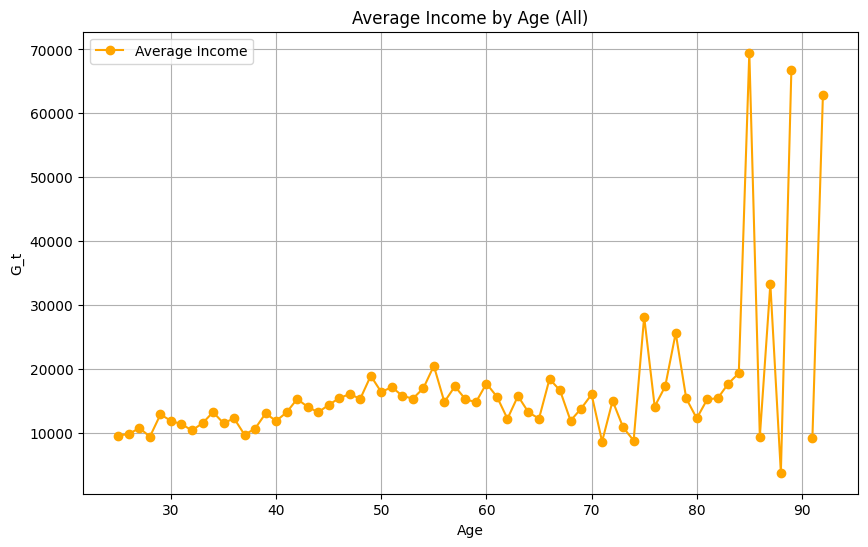

In [447]:
plt.figure(figsize=(10, 6))
plt.plot(income_by_age['Age'], income_by_age['G_t'], marker='o', color='orange', label='Average Income')
plt.xlabel('Age')
plt.ylabel('G_t')
plt.title('Average Income by Age (All)')
plt.legend()
plt.grid(True)
plt.show

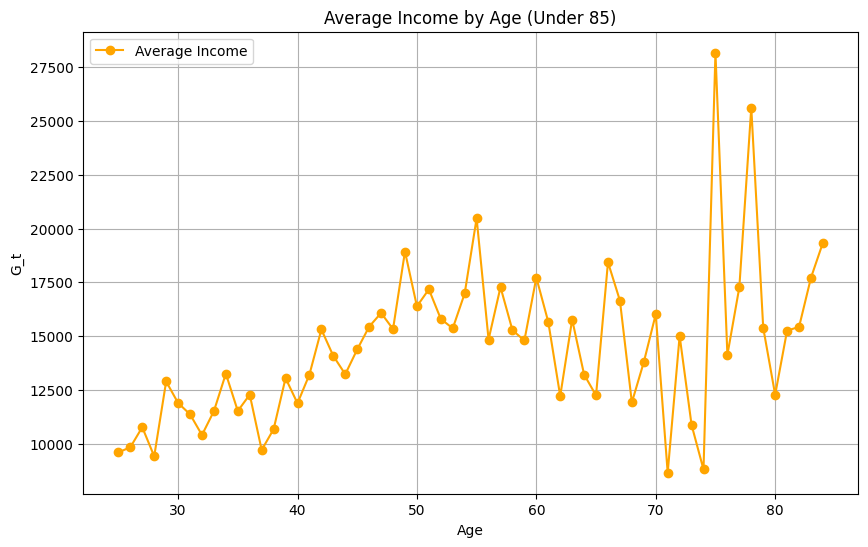

In [448]:
# Filter data for Age < 85
filtered_df = income_by_age[income_by_age['Age'] < 85]

# Plot again
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Age'], filtered_df['G_t'], marker='o', color='orange', label='Average Income')
plt.xlabel('Age')
plt.ylabel('G_t')
plt.title('Average Income by Age (Under 85)')
plt.legend()
plt.grid(True)
plt.show()

In [449]:
income_by_age.to_csv('G_t_new.csv', index=False)

In [450]:
# Wealth Data
df_wealth = pd.read_csv("muc6a.csv")
df_wealth['household_id'] = df_wealth.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_wealth.fillna(0, inplace=True)
df_wealth['m6ac7'] = df_wealth['m6ac7'] / 100
df_wealth

,tinh,huyen,xa,diaban,hoso,m6ama,m6ama1,m6ac3,m6ac4a,m6ac4b,m6ac5,m6ac6,m6ac7,household_id
0,101,1,3.0,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 14"
2,101,1,3.0,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 15"
3,101,1,9.0,19,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 9, 19, 15"
4,101,1,9.0,19,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 9, 19, 19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,823,13,12.0,25,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 12, 25, 15"
18144,823,13,12.0,25,19,2.0,0.0,1.0,0.0,1996.0,15000.0,45000.0,1.0,"823, 13, 12, 25, 19"
18145,823,13,17.0,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 17, 1, 13"
18146,823,13,17.0,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 17, 1, 14"


In [451]:
df_wealth['Value of Asset - Ownership'] = df_wealth['m6ac6']*df_wealth['m6ac7']*df_wealth['m6ac3']
df_wealth = df_wealth[['household_id', 'Value of Asset - Ownership']]
household_asset = df_wealth.groupby('household_id')['Value of Asset - Ownership'].sum().reset_index()
household_asset.rename(columns={'Value of Asset - Ownership': 'Value of Household Asset'}, inplace=True)
df_wealth = df_wealth.merge(household_asset, on='household_id', how='left')
df_wealth = df_wealth.drop_duplicates(subset='household_id', keep='first')
df_wealth = df_wealth[['household_id', 'Value of Household Asset']]
df_wealth

,household_id,Value of Household Asset
0,"101, 1, 3, 1, 13",0.0
1,"101, 1, 3, 1, 14",0.0
2,"101, 1, 3, 1, 15",0.0
3,"101, 1, 9, 19, 15",0.0
4,"101, 1, 9, 19, 19",0.0
...,...,...
18143,"823, 13, 12, 25, 15",0.0
18144,"823, 13, 12, 25, 19",45000.0
18145,"823, 13, 17, 1, 13",0.0
18146,"823, 13, 17, 1, 14",0.0


In [452]:
df_new = df_new.merge(df_wealth, on=['household_id'], how='left')
#df_new.to_csv("second_final.csv", index=False)
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,...,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5,Average Annual Consumption - All Categories,Log Total Household Income,Value of Household Asset
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,8150.0,18950.0,0.0,...,0.0,42351.0,56468.0,1,1,3,64,31346.000000,10.941429,0.0
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,7850.0,16235.0,0.0,...,0.0,0.0,42351.0,1,1,2,61,46958.800000,10.653747,0.0
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,760.0,7130.0,0.0,...,0.0,0.0,0.0,1,1,2,50,17959.800000,NaN,0.0
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,640.0,10040.0,0.0,...,0.0,33979.0,47203.0,1,1,3,50,15398.533333,10.762213,0.0
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,1800.0,17091.0,0.0,...,0.0,91855.0,163382.0,1,1,4,35,24359.200000,12.003846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,391.0,0.0,...,0.0,0.0,27677.0,1,1,6,78,2595.150000,10.228357,0.0
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,970.0,0.0,...,0.0,0.0,0.0,1,1,4,32,3588.075000,NaN,45000.0
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,70.0,355.0,0.0,...,0.0,0.0,0.0,1,1,3,57,3663.566667,NaN,0.0
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,300.0,760.0,0.0,...,0.0,0.0,0.0,1,1,5,45,3452.200000,NaN,0.0


In [453]:
# Calculate working hours by age group

df_n = pd.read_csv("muc4a.csv")
df_n = df_n[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac6', 'm4ac7', 'm4ac8','m4ac16', 'm4ac17', 'm4ac18']]
df_n = df_n.fillna(0)
df_n['household_id'] = df_n.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_n = df_n[
    (df_n[['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']].sum(axis=1) > 0)
]
household_counts = df_n['household_id'].value_counts().to_dict()
df_n['Household Size of Working People'] = df_n['household_id'].map(household_counts)
df_n

,tinh,huyen,xa,diaban,hoso,matv,m4ac6,m4ac7,m4ac8,m4ac16,m4ac17,m4ac18,household_id,Household Size of Working People
1,101,1,3.0,1,13,2,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 13",1
3,101,1,3.0,1,14,1,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 14",2
4,101,1,3.0,1,14,2,6.0,28.0,8.0,12.0,20.0,2.0,"101, 1, 3, 1, 14",2
6,101,1,3.0,1,15,1,12.0,20.0,5.0,0.0,0.0,0.0,"101, 1, 3, 1, 15",2
7,101,1,3.0,1,15,2,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 15",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,823,13,17.0,1,14,1,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4
35147,823,13,17.0,1,14,2,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4
35148,823,13,17.0,1,14,3,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4
35149,823,13,17.0,1,14,4,6.0,10.0,6.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4


In [454]:
df_n['Total Individual Working Hours per year'] = df_n['m4ac6']*df_n['m4ac7']*df_n['m4ac8']+ df_n['m4ac16']*df_n['m4ac17']*df_n['m4ac18']
household_n = df_n.groupby('household_id')['Total Individual Working Hours per year'].sum().reset_index()
household_n.rename(columns={'Total Individual Working Hours per year': 'Total Household Working Hours per year'}, inplace=True)
df_n = df_n.merge(household_n, on='household_id', how='left')
df_n['Average Household Working Hours']=df_n['Total Household Working Hours per year']/df_n['Household Size of Working People']
df_n

,tinh,huyen,xa,diaban,hoso,matv,m4ac6,m4ac7,m4ac8,m4ac16,m4ac17,m4ac18,household_id,Household Size of Working People,Total Individual Working Hours per year,Total Household Working Hours per year,Average Household Working Hours
0,101,1,3.0,1,13,2,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 13",1,2496.0,2496.0,2496.0
1,101,1,3.0,1,14,1,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 14",2,2496.0,4320.0,2160.0
2,101,1,3.0,1,14,2,6.0,28.0,8.0,12.0,20.0,2.0,"101, 1, 3, 1, 14",2,1824.0,4320.0,2160.0
3,101,1,3.0,1,15,1,12.0,20.0,5.0,0.0,0.0,0.0,"101, 1, 3, 1, 15",2,1200.0,3696.0,1848.0
4,101,1,3.0,1,15,2,12.0,26.0,8.0,0.0,0.0,0.0,"101, 1, 3, 1, 15",2,2496.0,3696.0,1848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22575,823,13,17.0,1,14,1,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4,2400.0,7560.0,1890.0
22576,823,13,17.0,1,14,2,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4,2400.0,7560.0,1890.0
22577,823,13,17.0,1,14,3,12.0,20.0,10.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4,2400.0,7560.0,1890.0
22578,823,13,17.0,1,14,4,6.0,10.0,6.0,0.0,0.0,0.0,"823, 13, 17, 1, 14",4,360.0,7560.0,1890.0


In [455]:
df_n = df_n.drop_duplicates(subset='household_id', keep='first')
df_n = df_n[['household_id', 'Household Size of Working People', 'Average Household Working Hours']]
df_n

,household_id,Household Size of Working People,Average Household Working Hours
0,"101, 1, 3, 1, 13",1,2496.000000
1,"101, 1, 3, 1, 14",2,2160.000000
3,"101, 1, 3, 1, 15",2,1848.000000
5,"101, 1, 9, 19, 15",2,1500.000000
7,"101, 1, 9, 19, 19",1,2208.000000
...,...,...,...
22568,"823, 13, 12, 25, 15",3,1353.333333
22571,"823, 13, 12, 25, 19",1,1800.000000
22572,"823, 13, 17, 1, 13",3,1104.000000
22575,"823, 13, 17, 1, 14",4,1890.000000


In [456]:
df_new = df_new.merge(df_n, on=['household_id'], how='left')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,...,Total Household Income,m1ac3,m1ac2,household_size,m1ac5,Average Annual Consumption - All Categories,Log Total Household Income,Value of Household Asset,Household Size of Working People,Average Household Working Hours
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,8150.0,18950.0,0.0,...,56468.0,1,1,3,64,31346.000000,10.941429,0.0,2.0,2160.000000
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,7850.0,16235.0,0.0,...,42351.0,1,1,2,61,46958.800000,10.653747,0.0,2.0,1848.000000
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,760.0,7130.0,0.0,...,0.0,1,1,2,50,17959.800000,NaN,0.0,2.0,1500.000000
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,640.0,10040.0,0.0,...,47203.0,1,1,3,50,15398.533333,10.762213,0.0,2.0,1976.000000
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,1800.0,17091.0,0.0,...,163382.0,1,1,4,35,24359.200000,12.003846,0.0,2.0,2616.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,391.0,0.0,...,27677.0,1,1,6,78,2595.150000,10.228357,0.0,3.0,1353.333333
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,970.0,0.0,...,0.0,1,1,4,32,3588.075000,NaN,45000.0,1.0,1800.000000
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,70.0,355.0,0.0,...,0.0,1,1,3,57,3663.566667,NaN,0.0,3.0,1104.000000
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,300.0,760.0,0.0,...,0.0,1,1,5,45,3452.200000,NaN,0.0,4.0,1890.000000


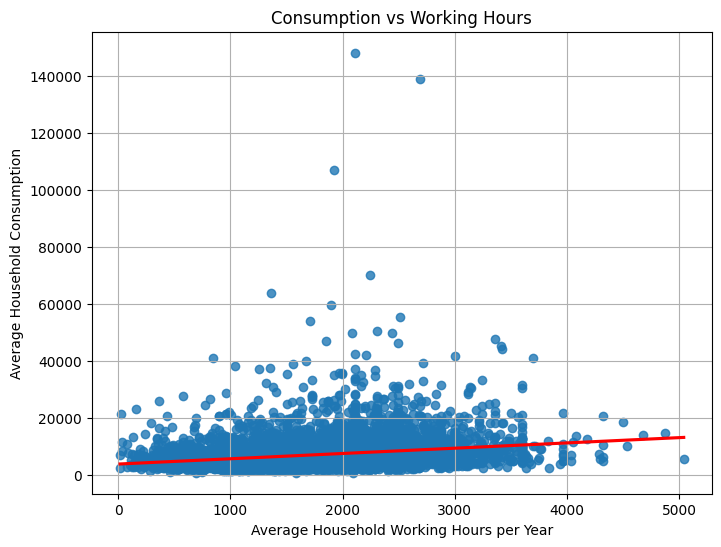

In [457]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_new,
    x='Average Household Working Hours',
    y='Average Annual Consumption - All Categories',
    scatter=True,
    ci=None,         
    line_kws={"color": "red"}  
)
plt.xlabel("Average Household Working Hours per Year")
plt.ylabel("Average Household Consumption")
plt.title("Consumption vs Working Hours")
plt.grid(True)
plt.show()

In [458]:
corr = df_new['Average Annual Consumption - All Categories'].corr(df_new['Average Household Working Hours'])
print(f"Correlation coefficient: {corr:.4f}")

Correlation coefficient: 0.2208


In [470]:
# Filter out households who work but income = 0
df_filtered = df_new[~((df_new['Total Household Income'] == 0) & (df_new['Average Household Working Hours'] > 0))]
df_filtered

wealth_by_age = df_filtered.groupby('m1ac5')['Value of Household Asset'].mean().reset_index()
consumption_by_age = df_filtered.groupby('m1ac5')['Average Annual Consumption - All Categories'].mean().reset_index()
n_by_age= df_filtered.groupby('m1ac5')['Average Household Working Hours'].mean().reset_index()
by_age = wealth_by_age.merge(consumption_by_age, on='m1ac5').merge(n_by_age, on='m1ac5')
by_age['Average Household Working Hours'] = by_age['Average Household Working Hours'] / (260*16)
by_age

by_age.to_csv("real_data_22.csv", index=False)

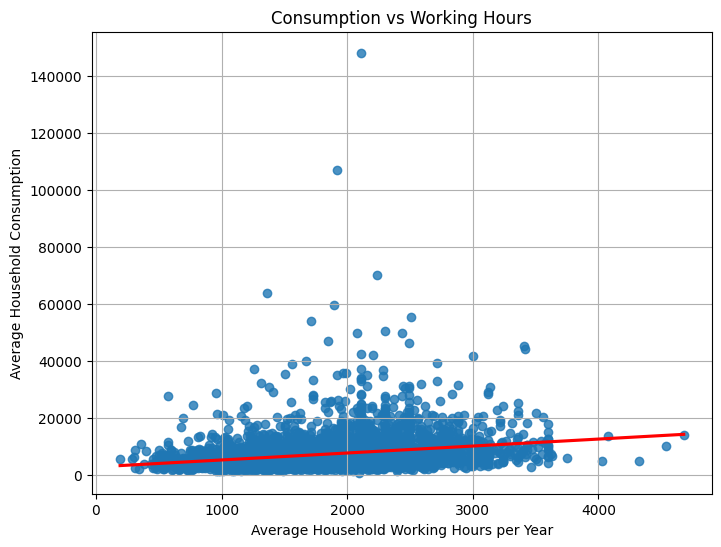

In [460]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_filtered,
    x='Average Household Working Hours',
    y='Average Annual Consumption - All Categories',
    scatter=True,
    ci=None,         
    line_kws={"color": "red"}  
)
plt.xlabel("Average Household Working Hours per Year")
plt.ylabel("Average Household Consumption")
plt.title("Consumption vs Working Hours")
plt.grid(True)
plt.show()

                                         OLS Regression Results                                        
Dep. Variable:     Average Annual Consumption - All Categories   R-squared:                       0.060
Model:                                                     OLS   Adj. R-squared:                  0.060
Method:                                          Least Squares   F-statistic:                     269.1
Date:                                         Mon, 21 Apr 2025   Prob (F-statistic):           1.10e-58
Time:                                                 20:19:57   Log-Likelihood:                -42735.
No. Observations:                                         4230   AIC:                         8.547e+04
Df Residuals:                                             4228   BIC:                         8.549e+04
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust  

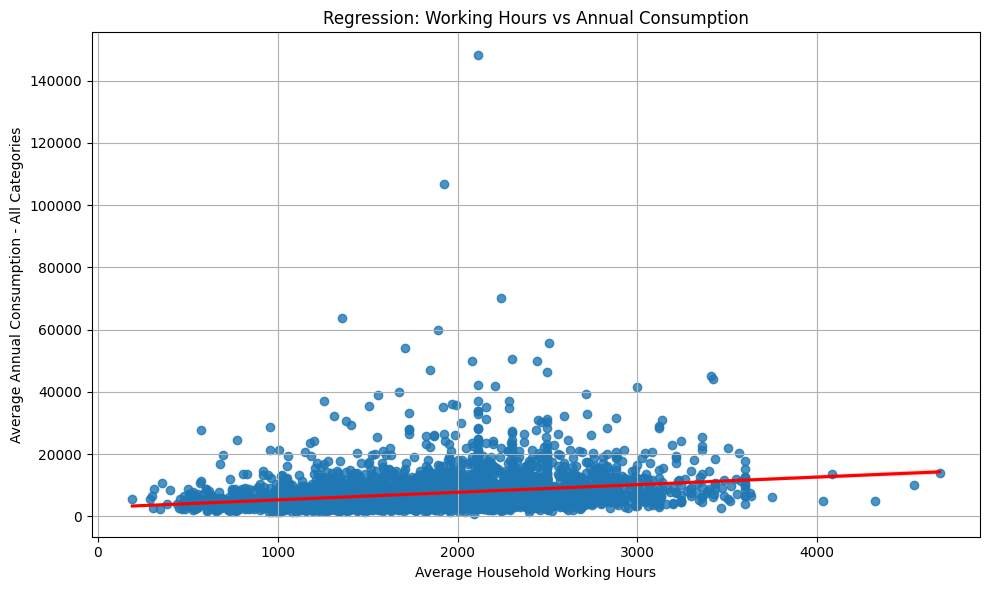

In [ ]:
import statsmodels.api as sm

df_reg = df_filtered[['Average Household Working Hours', 'Average Annual Consumption - All Categories']].dropna()

X = df_reg['Average Household Working Hours']
y = df_reg['Average Annual Consumption - All Categories']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

print(model.summary())

plt.figure(figsize=(10, 6))
sns.regplot(x='Average Household Working Hours', y='Average Annual Consumption - All Categories', data=df_reg, line_kws={"color": "red"})
plt.title('Regression: Working Hours vs Annual Consumption')
plt.xlabel('Average Household Working Hours')
plt.ylabel('Average Annual Consumption - All Categories')
plt.grid(True)
plt.tight_layout()
plt.show()

In [462]:
#Import Stargazer for model summary
from stargazer.stargazer import Stargazer

stargazer = Stargazer([model])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: Average Annual Consumption - All Categories}} \
\cr \cline{2-2}
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 Average Household Working Hours & 2.443$^{***}$ \\
& (0.149) \\
 const & 2829.857$^{***}$ \\
& (290.842) \\
\hline \\[-1.8ex]
 Observations & 4230 \\
 $R^2$ & 0.060 \\
 Adjusted $R^2$ & 0.060 \\
 Residual Std. Error & 5908.706 (df=4228) \\
 F Statistic & 269.144$^{***}$ (df=1; 4228) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}
